In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [11]:
import glob
import os

In [184]:
BaseDir = '/data/inspur_disk03/userdir/wangcx/BASS_stack/area1/area1_hdf5_2'

In [185]:
fps = glob.glob(BaseDir+'/*.hdf5')
fps = [i.replace(BaseDir+'/','') for i in fps]

In [186]:
def center(x):
    mean = x.mean()
    std = x.std()
    return (x-mean)/std

In [187]:
f = h5py.File(os.path.join(BaseDir,fps[0]), 'r')

In [189]:
os.path.join(BaseDir,fps[0])

'/data/inspur_disk03/userdir/wangcx/BASS_stack/area1/area1_hdf5_2/DR2_80156_1.hdf5'

In [193]:
n=0
for key, images in f.iteritems():
    g = center(images['g'][...].reshape(-1))
    r = center(images['r'][...].reshape(-1))
    z = center(images['z'][...].reshape(-1))
    data = np.c_[g,r,z].reshape(101,101,3)
    if np.isnan(data).sum():
        print(key)
        break

80156003405


/home/maotx/local/miniconda2/envs/work/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


In [200]:
f[key]['z'][...]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

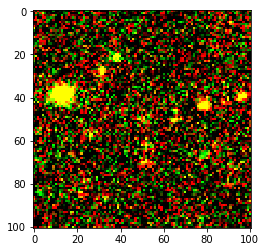

In [194]:
plt.imshow(data)

In [192]:
data

array([[[ 0.40328476,  0.22306599, -0.21343611],
        [-0.44628003, -0.8320537 , -0.4616163 ],
        [-0.32487288, -0.4740441 ,  1.6608795 ],
        ...,
        [-0.95307696,  0.5389926 ,  0.6620061 ],
        [ 0.31319165, -0.47956312,  1.8765616 ],
        [-0.07572154,  0.30308187,  0.5326224 ]],

       [[-0.18717259, -0.24242796, -0.4388245 ],
        [-1.108703  , -0.16425091,  0.05189675],
        [-0.595999  ,  0.7043167 , -0.8613132 ],
        ...,
        [-0.19959465,  0.12169254,  1.480487  ],
        [ 1.1050858 ,  0.19481307, -0.13288154],
        [ 0.3635994 ,  0.81990594,  0.7523583 ]],

       [[-1.0954655 , -0.24239069,  0.67605793],
        [-1.0964369 , -0.2698603 ,  1.2743757 ],
        [-0.620227  ,  0.8130561 ,  0.7620682 ],
        ...,
        [-0.37461668, -0.5113359 ,  0.36352083],
        [ 1.1035362 , -0.21140309, -0.80836266],
        [-0.22770658,  0.12810682, -0.7256881 ]],

       ...,

       [[ 0.5569484 , -0.5736708 , -3.0159879 ],
        [-0

In [69]:
data.mean()

0.0

In [70]:
data.std()

0.99999994

In [98]:
a = ['1','2','3','4']
b = np.arange(10,14)*1.

In [99]:
ss = zip(a,b)

In [100]:
ss

[('1', 10.0), ('2', 11.0), ('3', 12.0), ('4', 13.0)]

In [108]:
{ss[i][0]:ss[i][1] for i in range(len(ss))}

{'1': 10.0, '2': 11.0, '3': 12.0, '4': 13.0}

In [125]:
pre = '/data/dell5/userdir/maotx/Lens/result/area1_175.npy'

In [126]:
s = np.load(pre).item()

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [116]:
s1 = dict(ss)

In [117]:
s1

{'1': 10.0, '2': 11.0, '3': 12.0, '4': 13.0}

In [120]:
{**s1}

SyntaxError: invalid syntax (<ipython-input-120-18c6ee61d2ca>, line 1)

In [158]:
pre = '/data/dell5/userdir/maotx/Lens/result/area1_hdf5_2/DR2_80155_1.txt'

In [159]:
with open(pre,'r') as fp:
    data = fp.readlines()

In [168]:
ss = [i.replace('\n','').split('\t') for i in data]

In [169]:
s = {ss[i][0]: float(ss[i][1])/(float(ss[i][1])+float(ss[i][2])) for i in range(len(ss))}

In [177]:
prob = np.array(s.values())

In [ ]:
np.isnan(prob)

(array([174.,  69.,  64.,  52.,  54.,  38.,  58.,  73., 124., 792.]),
 array([3.41253679e-04, 1.00305276e-01, 2.00269299e-01, 3.00233322e-01,
        4.00197345e-01, 5.00161367e-01, 6.00125390e-01, 7.00089413e-01,
        8.00053435e-01, 9.00017458e-01, 9.99981481e-01]),
 <a list of 10 Patch objects>)

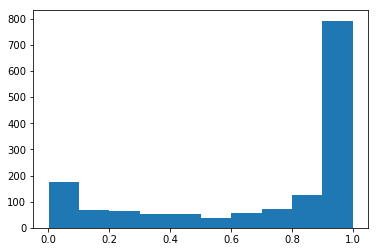

In [183]:
plt.hist(prob[np.logical_not(np.isnan(prob))])

In [146]:
ss[i][1]

'0.997718095779419'

In [147]:
ss[i][2]

'0.00234715873375535\n'

In [156]:
1500./21

71.42857142857143

In [ ]:
w